In [23]:
from IPython.display import display, Math
import plotly.express as px
import plotly.graph_objects as go

from matplotlib import pyplot as plt

from tqdm import tqdm

import numpy as np

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
def colored_text(text, color):
    return display(Math(r'\textcolor{'+color+r'}{\verb|'+text+r'|}'))



С вашим датасетом нужно проделать примерно то же самое, что мы делали на лекции. Обратите внимание, что у вас может быть задача классификации, а мы решали задачу регрессии  (также можно посмотреть [19-02. Adult.ipynb](https://github.com/NikolaiZolotykh/MachineLearningCourse/blob/master/19-02.%20Adult.ipynb), где решается задача классификации). Все должно быть выложено на ваш гит.
А именно:

<font color = 'lime'>0.</font> Описать задачу словами

<font color = 'lime'>1.</font> Прочитать данные

<font color = 'lime'>2.</font> Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.

<font color = 'lime'>3.</font> Обработать пропущенные значения (или убедиться, что их нет)

<font color = 'lime'>4.</font> Обработать категориальные признаки

<font color = 'lime'>5.</font> Провести нормализацию (или объяснить, почему в вашем случае она не нужна)

<font color = 'lime'>6.</font> Разбить данные на обучающую и тестовую выборки

<font color = 'lime'>7.</font> Запустить классификатор (ререссию) ближайших соседей или другой метод (аргументируйте выбор!)

<font color = 'lime'>8.</font> Вычислить ошибки на обучающей и тестовой выборках. Выбрать оптимальное значение гиперпараметра (к-ва ближайших соседей) Сделать выводы

<font color = 'yellow'>9.</font> По желанию: запустить другие классификаторы. Сравнить результаты

<font color = 'red'>10.</font> По желанию: как-то побороться с несбалансированностью классов (если она есть)

<font color = 'red'>11</font> По желанию: исключить коррелированные переменные (объяснить зачем)

<font color = 'lime'>12.</font> Сделать общие выводы

# 0. Описание задачи

Задача определения стоимости квартиры, по таким признакам как:
* площадь
* количество комнат
* этаж
* расстояние до школы/садика/аптеки
* координаты
и др



# 1. Чтение данных

In [3]:
!pip install gdown

In [4]:
from gdown import download
url = r'https://drive.google.com/file/d/1UxGPpyjZULFvSmvwc43_ewSmCsiWtfap/view?usp=sharing'
dataset_id = r'1UxGPpyjZULFvSmvwc43_ewSmCsiWtfap'
download(id = dataset_id, output = 'dataset.csv')

Downloading...
From: https://drive.google.com/uc?id=1UxGPpyjZULFvSmvwc43_ewSmCsiWtfap
To: /content/dataset.csv
100%|██████████| 4.07M/4.07M [00:00<00:00, 20.4MB/s]


'dataset.csv'

In [5]:
import pandas as pd
df = pd.read_csv('dataset.csv')
df = df.drop(columns=['id'])

In [6]:
df.head(2)

city               type  squareMeters  rooms  floor  floorCount  \
0  szczecin       blockOfFlats         47.00    2.0    6.0        12.0   
1  szczecin  apartmentBuilding         88.22    3.0    1.0         2.0   

   buildYear   latitude  longitude  centreDistance  ...  pharmacyDistance  \
0     1981.0  53.428544  14.552812            0.79  ...             0.085   
1     2000.0  53.449093  14.516844            4.09  ...             0.668   

     ownership  buildingMaterial  condition  hasParkingSpace  hasBalcony  \
0  condominium      concreteSlab        NaN               no         yes   
1  condominium             brick    premium              yes         yes   

   hasElevator  hasSecurity hasStorageRoom   price  
0          yes           no            yes  449000  
1           no           no             no  950000  

[2 rows x 27 columns]

# 1.5 информация о датасете

In [ ]:
print(f'Количество записей: {df.shape[0]}')
print(f'Количество признаков: {df.shape[1]}')

Количество записей: 21501
Количество признаков: 27


In [ ]:
isnu = df.isna().sum().sum()
all = df.shape[0]*df.shape[1]
print(f'Количество пропущенных значений: {isnu}')
print(f'Процентное соотношение пропущенных значений: {round(isnu/all*100,2)}%')

Количество пропущенных значений: 37990
Процентное соотношение пропущенных значений: 6.54%


In [ ]:
quantiles = [0.005,.01,.05,.1,.5,.9,.95,.99,.995]
num_cols = df.select_dtypes(exclude=['object']).columns
outliers_counter = 0

for col in num_cols:
    quant = df[col].quantile(quantiles)
    cur_outlier = df[col][ (df[col]>df[col].quantile(quantiles[-1])) | (df[col]<df[col].quantile(quantiles[0])) ].shape[0]
    outliers_counter +=df[col][ (df[col]>df[col].quantile(quantiles[-1])) | (df[col]<df[col].quantile(quantiles[0])) ].shape[0]

all = df.shape[0]*df.shape[1]
print(f"Количество выборсов: {outliers_counter}")
print(f"Процентное соотношение выбросов: {round(outliers_counter/all*100,2)}%")

Количество выборсов: 2859
Процентное соотношение выбросов: 0.49%


# 2. Визуализация данных и их основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретация.

In [ ]:
colored_text('Основные характеристики датасета','cyan')
df.describe()

<IPython.core.display.Math object>

squareMeters         rooms         floor    floorCount     buildYear  \
count  21501.000000  21501.000000  17928.000000  21292.000000  18121.000000   
mean      56.968572      2.622948      3.404786      5.474826   1986.774129   
std       20.617717      0.892924      2.606225      3.407545     32.796668   
min       25.000000      1.000000      1.000000      1.000000   1850.000000   
25%       42.690000      2.000000      2.000000      3.000000   1969.000000   
50%       52.810000      3.000000      3.000000      4.000000   1993.000000   
75%       66.300000      3.000000      4.000000      7.000000   2016.000000   
max      150.000000      6.000000     29.000000     29.000000   2024.000000   

           latitude     longitude  centreDistance      poiCount  \
count  21501.000000  21501.000000    21501.000000  21501.000000   
mean      51.992750     19.496174        4.431978     20.542951   
std        1.313801      1.754150        2.783001     23.905646   
min       49.982066     14.447127        0.020000      0.000000   
25%       51.103600     18.539977        2.130000      7.000000   
50%       52.194157     19.914700        4.130000     14.000000   
75%       52.379000     20.988591        6.250000     24.000000   
max       54.582870     23.208873       16.480000    212.000000   

       schoolDistance  clinicDistance  postOfficeDistance  \
count    21490.000000    21438.000000        21481.000000   
mean         0.407994        0.970949            0.510007   
std          0.442670        0.882206            0.474219   
min          0.005000        0.005000            0.002000   
25%          0.178000        0.361000            0.238000   
50%          0.289000        0.677000            0.392000   
75%          0.462000        1.244000            0.621000   
max          4.920000        4.918000            4.801000   

       kindergartenDistance  restaurantDistance  collegeDistance  \
count          21482.000000        21470.000000     20917.000000   
mean               0.357013            0.335759         1.440711   
std                0.414213            0.433327         1.103795   
min                0.001000            0.001000         0.006000   
25%                0.154000            0.112000         0.565000   
50%                0.256000            0.224000         1.121000   
75%                0.411000            0.402000         2.050000   
max                4.767000            4.928000         5.000000   

       pharmacyDistance         price  
count      21471.000000  2.150100e+04  
mean           0.347109  8.238679e+05  
std            0.427962  4.311267e+05  
min            0.001000  1.910000e+05  
25%            0.136000  5.490000e+05  
50%            0.235000  7.218240e+05  
75%            0.403000  9.650000e+05  
max            4.802000  3.000000e+06

array([[<Axes: xlabel='squareMeters', ylabel='squareMeters'>,
        <Axes: xlabel='rooms', ylabel='squareMeters'>,
        <Axes: xlabel='floor', ylabel='squareMeters'>,
        <Axes: xlabel='floorCount', ylabel='squareMeters'>,
        <Axes: xlabel='buildYear', ylabel='squareMeters'>,
        <Axes: xlabel='latitude', ylabel='squareMeters'>,
        <Axes: xlabel='longitude', ylabel='squareMeters'>,
        <Axes: xlabel='centreDistance', ylabel='squareMeters'>,
        <Axes: xlabel='poiCount', ylabel='squareMeters'>,
        <Axes: xlabel='schoolDistance', ylabel='squareMeters'>,
        <Axes: xlabel='clinicDistance', ylabel='squareMeters'>,
        <Axes: xlabel='postOfficeDistance', ylabel='squareMeters'>,
        <Axes: xlabel='kindergartenDistance', ylabel='squareMeters'>,
        <Axes: xlabel='restaurantDistance', ylabel='squareMeters'>,
        <Axes: xlabel='collegeDistance', ylabel='squareMeters'>,
        <Axes: xlabel='pharmacyDistance', ylabel='squareMeters'>,
     

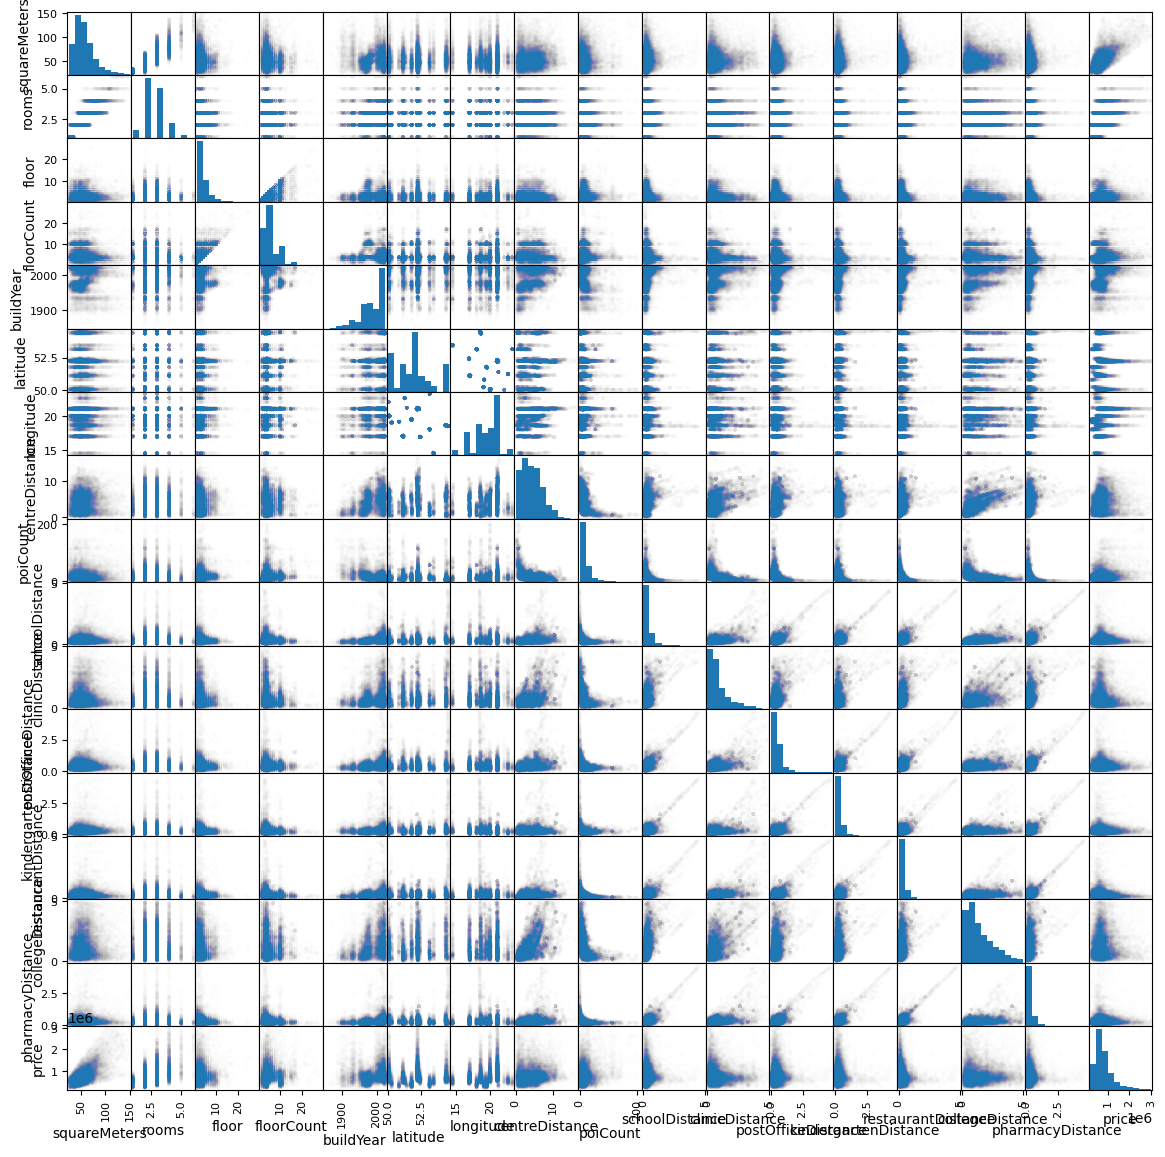

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,alpha = 0.005,figsize = (14,14))

После изучения графиков можно сказать, что явных выбросов в данных не наблюдается

<Axes: >

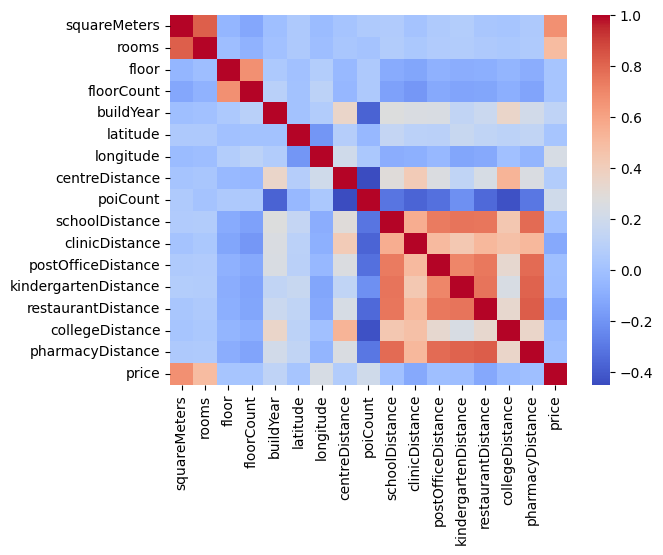

In [ ]:
import seaborn as sns
num_df = df.select_dtypes(exclude=['object'])
sns.heatmap(num_df.corr(), cmap = 'coolwarm')

<font color="gray">В датасете poi - point of interest</font>


Изучив матрицу корреляции можно заметить, что между собой сильно связаны следующие признаки:

* poiCount - \[poi\]Distance
* price - squareMeters
* \[poi\]Distance - \[poi\]Distance
* squareMeters - rooms

Из геометрических соображений понятно, почему расстояния до ключевых объектов(школа, садик, аптека и тд) связаны между собой

Из логических соображений понятно, почему цена цвартиры сильно зависит от её площади и почему площадь зависит от количества комнат

Понятно, что при увеличении расстояния до ближайшего ключевого объекта poiCount(количество таких объектов на расстоянии в 500м) уменьшается

In [ ]:
df.columns

Index(['city', 'type', 'squareMeters', 'rooms', 'floor', 'floorCount',
       'buildYear', 'latitude', 'longitude', 'centreDistance', 'poiCount',
       'schoolDistance', 'clinicDistance', 'postOfficeDistance',
       'kindergartenDistance', 'restaurantDistance', 'collegeDistance',
       'pharmacyDistance', 'ownership', 'buildingMaterial', 'condition',
       'hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity',
       'hasStorageRoom', 'price'],
      dtype='object')

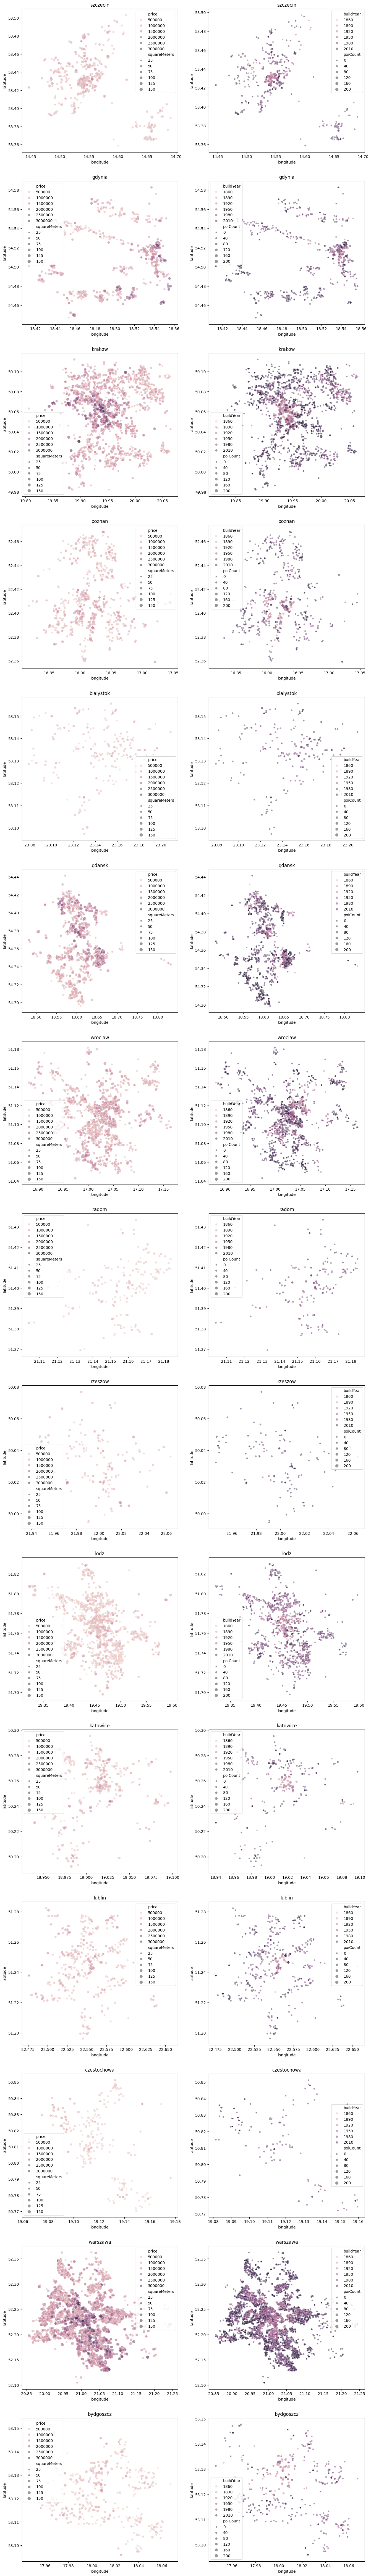

In [ ]:
from matplotlib import pyplot as plt

city_arr = df['city'].unique()

fig, ax = plt.subplots(len(city_arr),2,figsize = (8*2,len(city_arr)*8))

for i,city in enumerate(city_arr):
    sns.scatterplot(y = df['latitude'][df['city'] == city], x = df['longitude'][df['city'] == city], hue = df['price'], size = df['squareMeters'], ax = ax[i][0], alpha = 0.5)
    sns.scatterplot(y = df['latitude'][df['city'] == city], x = df['longitude'][df['city'] == city], hue = df['buildYear'], size = df['poiCount'], ax = ax[i][1], alpha = 0.5)
    ax[i][0].set_title(city)
    ax[i][1].set_title(city)

In [ ]:
df.columns

Index(['id', 'city', 'type', 'squareMeters', 'rooms', 'floor', 'floorCount',
       'buildYear', 'latitude', 'longitude', 'centreDistance', 'poiCount',
       'schoolDistance', 'clinicDistance', 'postOfficeDistance',
       'kindergartenDistance', 'restaurantDistance', 'collegeDistance',
       'pharmacyDistance', 'ownership', 'buildingMaterial', 'condition',
       'hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity',
       'hasStorageRoom', 'price'],
      dtype='object')

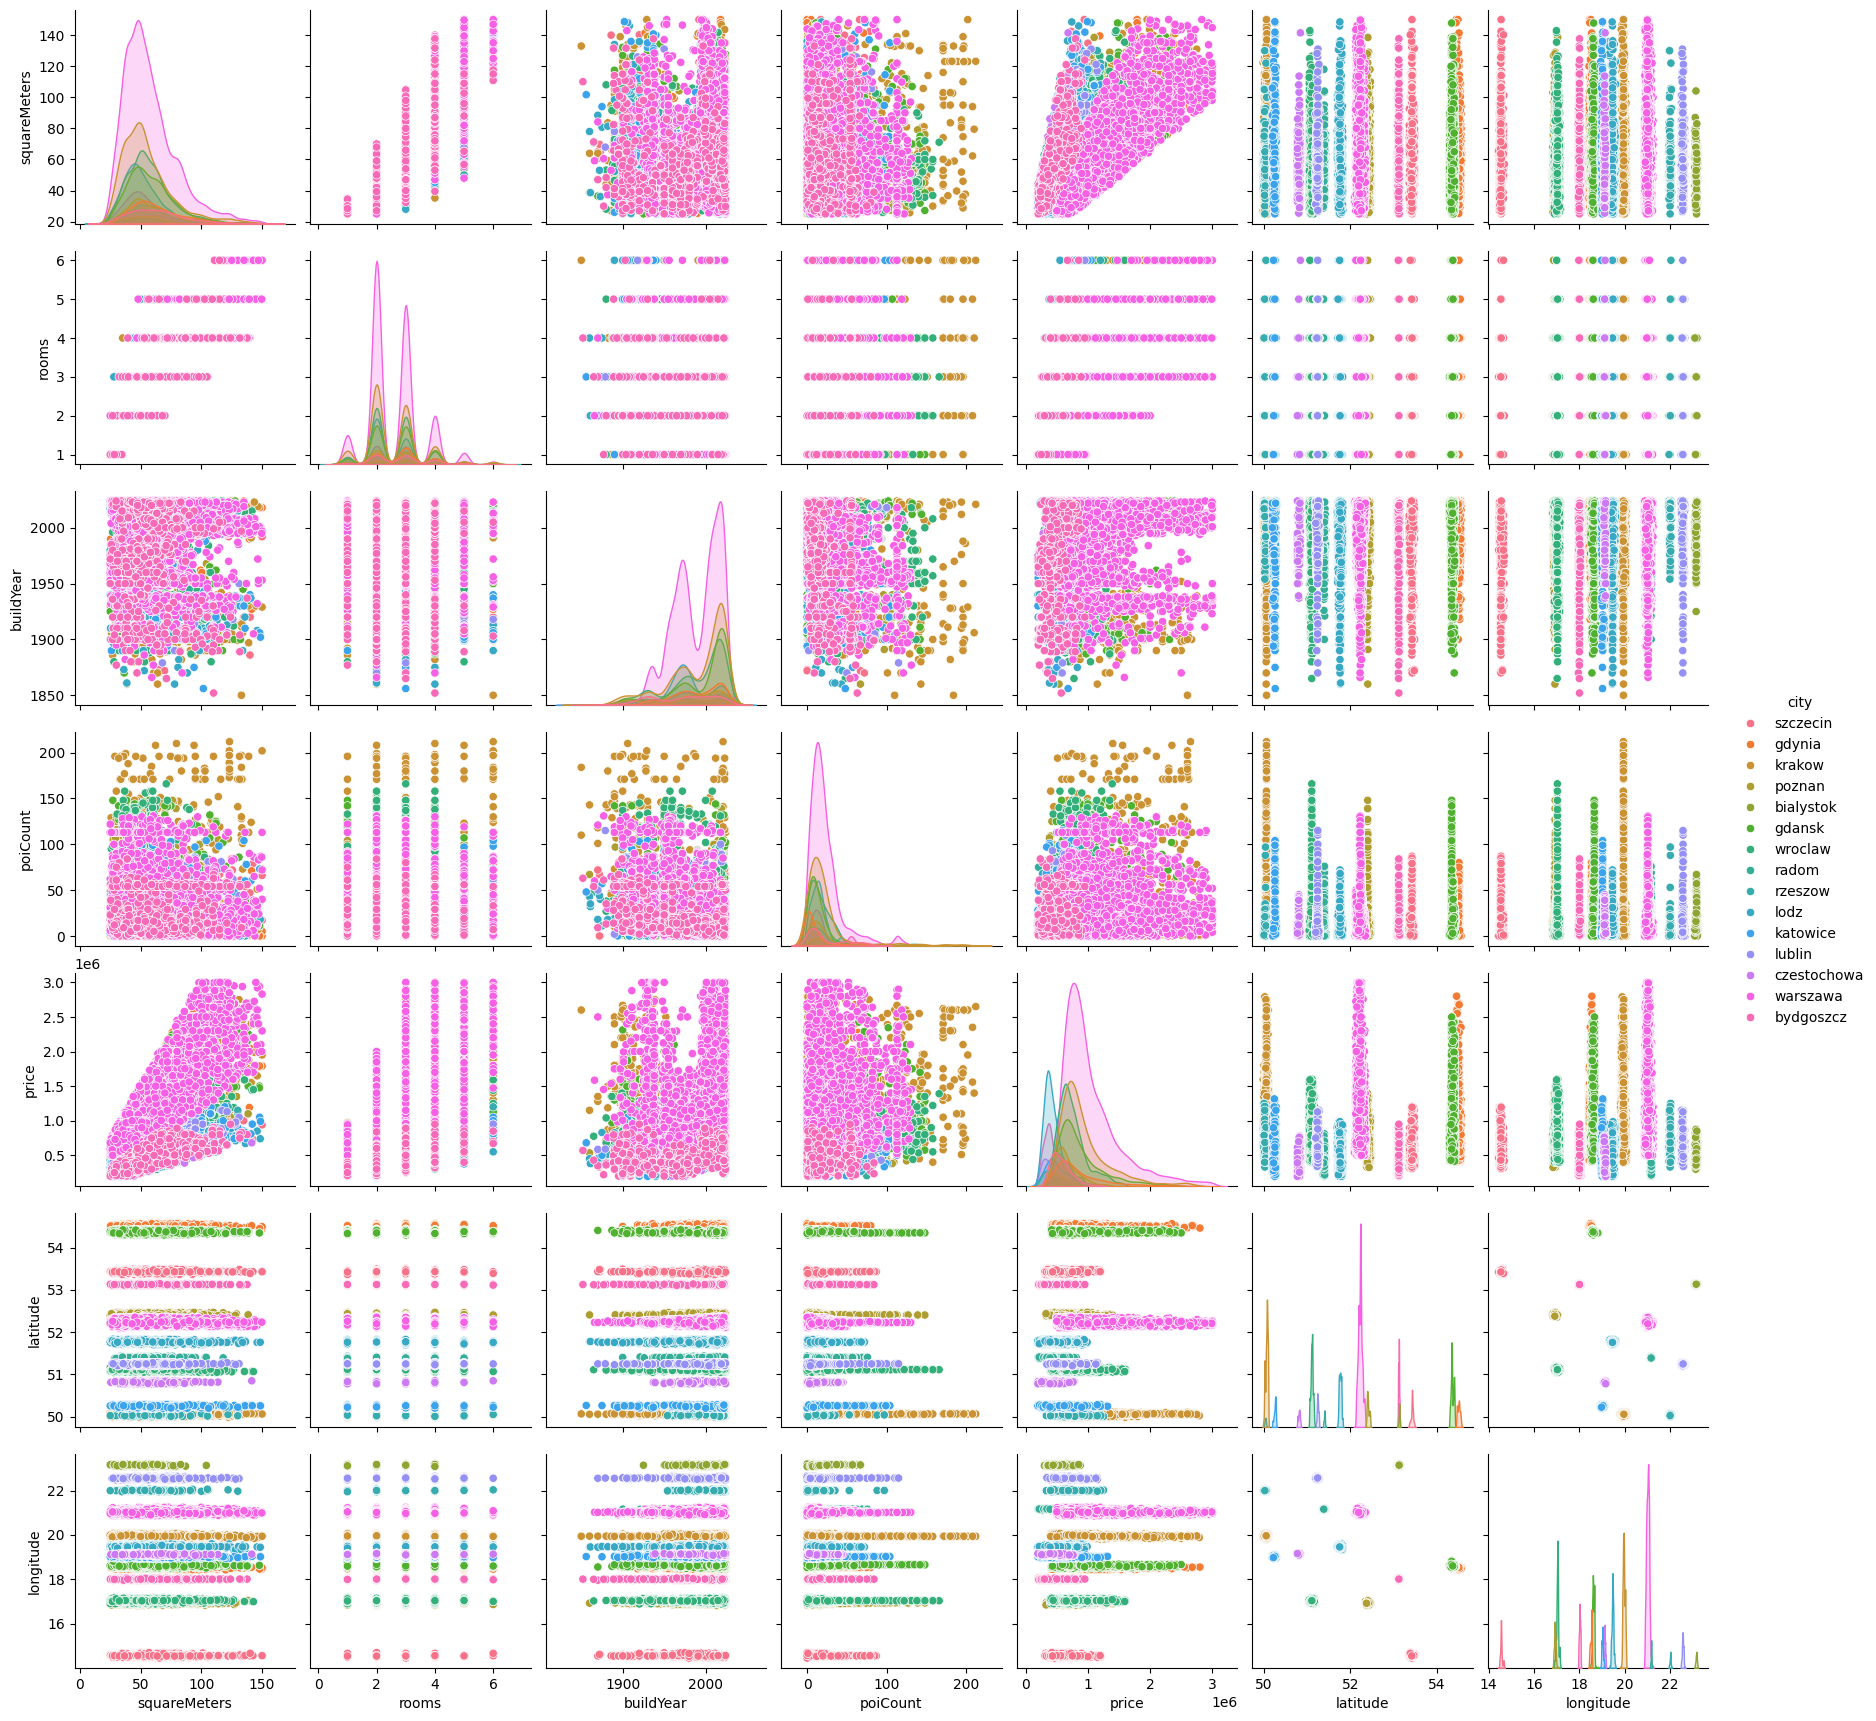

In [ ]:
sns.pairplot(df[['city','squareMeters','rooms','buildYear','poiCount','price','latitude','longitude']], hue = 'city')

In [ ]:
sns.pairplot(df[num_cols], hue = 'city')

# 2.5 Разделение на тестовую и тренировочную выборки

In [7]:
X = df.drop(['price'], axis=1)
y = df['price']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(16125, 5376)

# 3. Обработка пропущенных значений

In [9]:
colored_text('Необработанные данные','cyan')

display(X_train.isna().sum())

<IPython.core.display.Math object>

city                        0
type                     3349
squareMeters                0
rooms                       0
floor                    2721
floorCount                160
buildYear                2557
latitude                    0
longitude                   0
centreDistance              0
poiCount                    0
schoolDistance             10
clinicDistance             48
postOfficeDistance         17
kindergartenDistance       18
restaurantDistance         28
collegeDistance           447
pharmacyDistance           26
ownership                   0
buildingMaterial         6641
condition               11920
hasParkingSpace             0
hasBalcony                  0
hasElevator               735
hasSecurity                 0
hasStorageRoom              0
dtype: int64

В данном датасете наблюдается большое количество пропущенных значений. По этой причине необходимо заполнить ячейки с пропущенными значениями. Для заполнения будет выбрана стратегия заполнения, использующая медианные значения

In [10]:
filled_df = X_train.copy()
num_cols = filled_df.select_dtypes(exclude=['object']).columns


In [11]:
from sklearn.impute import SimpleImputer
imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
imp_num.fit(X_train[num_cols])
filled_df[num_cols] = imp_num.transform(X_train[num_cols])

In [12]:
colored_text('Заполнения числовых признаков','cyan')
filled_df.isna().sum()

<IPython.core.display.Math object>

city                        0
type                     3349
squareMeters                0
rooms                       0
floor                       0
floorCount                  0
buildYear                   0
latitude                    0
longitude                   0
centreDistance              0
poiCount                    0
schoolDistance              0
clinicDistance              0
postOfficeDistance          0
kindergartenDistance        0
restaurantDistance          0
collegeDistance             0
pharmacyDistance            0
ownership                   0
buildingMaterial         6641
condition               11920
hasParkingSpace             0
hasBalcony                  0
hasElevator               735
hasSecurity                 0
hasStorageRoom              0
dtype: int64

Все числовые признаки признаки дополнились соответствующими медианными значениями. Осталось рассмотреть категориальные признами

In [13]:
cat_cols = X_train.select_dtypes(['object']).columns
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat.fit(X_train[cat_cols])
filled_df[cat_cols] = imp_cat.transform(X_train[cat_cols])

In [14]:
filled_df.isna().sum()

city                    0
type                    0
squareMeters            0
rooms                   0
floor                   0
floorCount              0
buildYear               0
latitude                0
longitude               0
centreDistance          0
poiCount                0
schoolDistance          0
clinicDistance          0
postOfficeDistance      0
kindergartenDistance    0
restaurantDistance      0
collegeDistance         0
pharmacyDistance        0
ownership               0
buildingMaterial        0
condition               0
hasParkingSpace         0
hasBalcony              0
hasElevator             0
hasSecurity             0
hasStorageRoom          0
dtype: int64

In [15]:
X_train = filled_df

# 4. Обработатка категориальных признаков

In [16]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output= False)
enc.fit(X_train[cat_cols])

OneHotEncoder(drop='if_binary', sparse_output=False)

In [17]:
dummies = pd.DataFrame(enc.transform(X_train[cat_cols]),
                       columns=enc.get_feature_names_out(), index=X_train.index)
dummies.head()

city_bialystok  city_bydgoszcz  city_czestochowa  city_gdansk  \
11135             0.0             0.0               0.0          0.0   
4751              0.0             0.0               0.0          0.0   
19903             0.0             0.0               0.0          0.0   
16484             0.0             0.0               0.0          0.0   
17719             0.0             0.0               0.0          0.0   

       city_gdynia  city_katowice  city_krakow  city_lodz  city_lublin  \
11135          0.0            0.0          0.0        1.0          0.0   
4751           0.0            0.0          0.0        0.0          0.0   
19903          0.0            0.0          0.0        0.0          0.0   
16484          0.0            0.0          0.0        0.0          0.0   
17719          0.0            0.0          0.0        0.0          0.0   

       city_poznan  ...  ownership_condominium  ownership_cooperative  \
11135          0.0  ...                    1.0                    0.0   
4751           1.0  ...                    1.0                    0.0   
19903          0.0  ...                    0.0                    1.0   
16484          0.0  ...                    1.0                    0.0   
17719          0.0  ...                    1.0                    0.0   

       ownership_udział  buildingMaterial_concreteSlab  condition_premium  \
11135               0.0                            1.0                1.0   
4751                0.0                            0.0                1.0   
19903               0.0                            0.0                1.0   
16484               0.0                            0.0                1.0   
17719               0.0                            0.0                1.0   

       hasParkingSpace_yes  hasBalcony_yes  hasElevator_yes  hasSecurity_yes  \
11135                  0.0             1.0              0.0              0.0   
4751                   0.0             0.0              1.0              0.0   
19903                  1.0             0.0              1.0              1.0   
16484                  0.0             1.0              1.0              0.0   
17719                  0.0             0.0              0.0              0.0   

       hasStorageRoom_yes  
11135                 1.0  
4751                  0.0  
19903                 0.0  
16484                 0.0  
17719                 1.0  

[5 rows x 28 columns]

In [18]:
X_train = pd.concat((X_train, dummies), axis=1).drop(cat_cols, axis=1)
X_train.head(2)

squareMeters  rooms  floor  floorCount  buildYear   latitude  \
11135         45.14    2.0    4.0         4.0     1970.0  51.730165   
4751          47.00    3.0    3.0         4.0     1994.0  52.437000   

       longitude  centreDistance  poiCount  schoolDistance  ...  \
11135  19.476871            5.91      19.0           0.522  ...   
4751   16.937600            3.24      21.0           0.267  ...   

       ownership_condominium  ownership_cooperative  ownership_udział  \
11135                    1.0                    0.0               0.0   
4751                     1.0                    0.0               0.0   

       buildingMaterial_concreteSlab  condition_premium  hasParkingSpace_yes  \
11135                            1.0                1.0                  0.0   
4751                             0.0                1.0                  0.0   

       hasBalcony_yes  hasElevator_yes  hasSecurity_yes  hasStorageRoom_yes  
11135             1.0              0.0              0.0                 1.0  
4751              0.0              1.0              0.0                 0.0  

[2 rows x 44 columns]

# 5. Проведение нормализации

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_train.head(2)

squareMeters     rooms     floor  floorCount  buildYear  latitude  \
11135     -0.572204 -0.695405  0.277502   -0.432737  -0.600069 -0.203217   
4751      -0.481913  0.425599 -0.144124   -0.432737   0.198241  0.335033   

       longitude  centreDistance  poiCount  schoolDistance  ...  \
11135  -0.012274        0.539593 -0.065039        0.260475  ...   
4751   -1.454753       -0.425493  0.018258       -0.316819  ...   

       ownership_condominium  ownership_cooperative  ownership_udział  \
11135               0.336597              -0.336368         -0.011138   
4751                0.336597              -0.336368         -0.011138   

       buildingMaterial_concreteSlab  condition_premium  hasParkingSpace_yes  \
11135                       2.443042           0.370466            -0.616229   
4751                       -0.409326           0.370466            -0.616229   

       hasBalcony_yes  hasElevator_yes  hasSecurity_yes  hasStorageRoom_yes  
11135        0.847340        -1.079491        -0.374676            1.139006  
4751        -1.180165         0.926362        -0.374676           -0.877958  

[2 rows x 44 columns]

# 6. Обучение

In [20]:
# Заполнение пропущенных значений:
X_test[num_cols] = imp_num.transform(
    X_test[num_cols])
X_test[cat_cols] = imp_cat.transform(X_test[cat_cols])

# One-hot encoding:
dummies = pd.DataFrame(enc.transform(X_test[cat_cols]),
                       columns=enc.get_feature_names_out(), index=X_test.index)
X_test = pd.concat((X_test, dummies), axis=1).drop(cat_cols, axis=1)

# Масштабирование:
X_test = pd.DataFrame(scaler.transform(X_test),
                      columns=X_test.columns, index=X_test.index)

## <font color = 'DodgerBlue'>лин. регрессия</font>

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_predict = model.predict(X_train)

In [ ]:
RSS = ((y_train_predict - y_train)**2).sum()
RSS/N_train, (RSS/N_train)**.5

(40557090257.316025, 201387.90990850475)

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print(f'MSE_train:{MSE_train}\n MSE_test:{MSE_test}\n R2_train:{R2_train}\n R2_test:{R2_test}')

MSE_train:40557090257.316025
 MSE_test:8.136742196092396e+33
 R2_train:0.7820722907154036
 R2_test:-4.395470952276309e+22


## <font color = 'DodgerBlue'>K ближ. соседей</font>

In [21]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=7) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:


MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print(f'MSE_train:{MSE_train}\n MSE_test:{MSE_test}\n R2_train:{R2_train}\n R2_test:{R2_test}')

MSE_train:128477367433.62074
 MSE_test:127500960835.89426
 R2_train:0.309645287615925
 R2_test:0.3112393679983706


In [ ]:
from tqdm import tqdm
data = {}
min_k = 1
max_k = 100
#k_arr = [(k-1)*k for k in range(20,32)]
k_arr = range(min_k,max_k,2)
for k in tqdm(k_arr):
    model = KNeighborsRegressor(n_neighbors=k) # по умолчанию n_neighbors=5
    model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    y_test_predict  = model.predict(X_test)
    MSE_train = mean_squared_error(y_train, y_train_predict)
    MSE_test  = mean_squared_error(y_test,  y_test_predict)
    R2_train = r2_score(y_train, y_train_predict)
    R2_test  = r2_score(y_test,  y_test_predict)
    data[k]= (MSE_train,MSE_test,R2_train,R2_test)


100%|██████████| 50/50 [03:00<00:00,  3.61s/it]


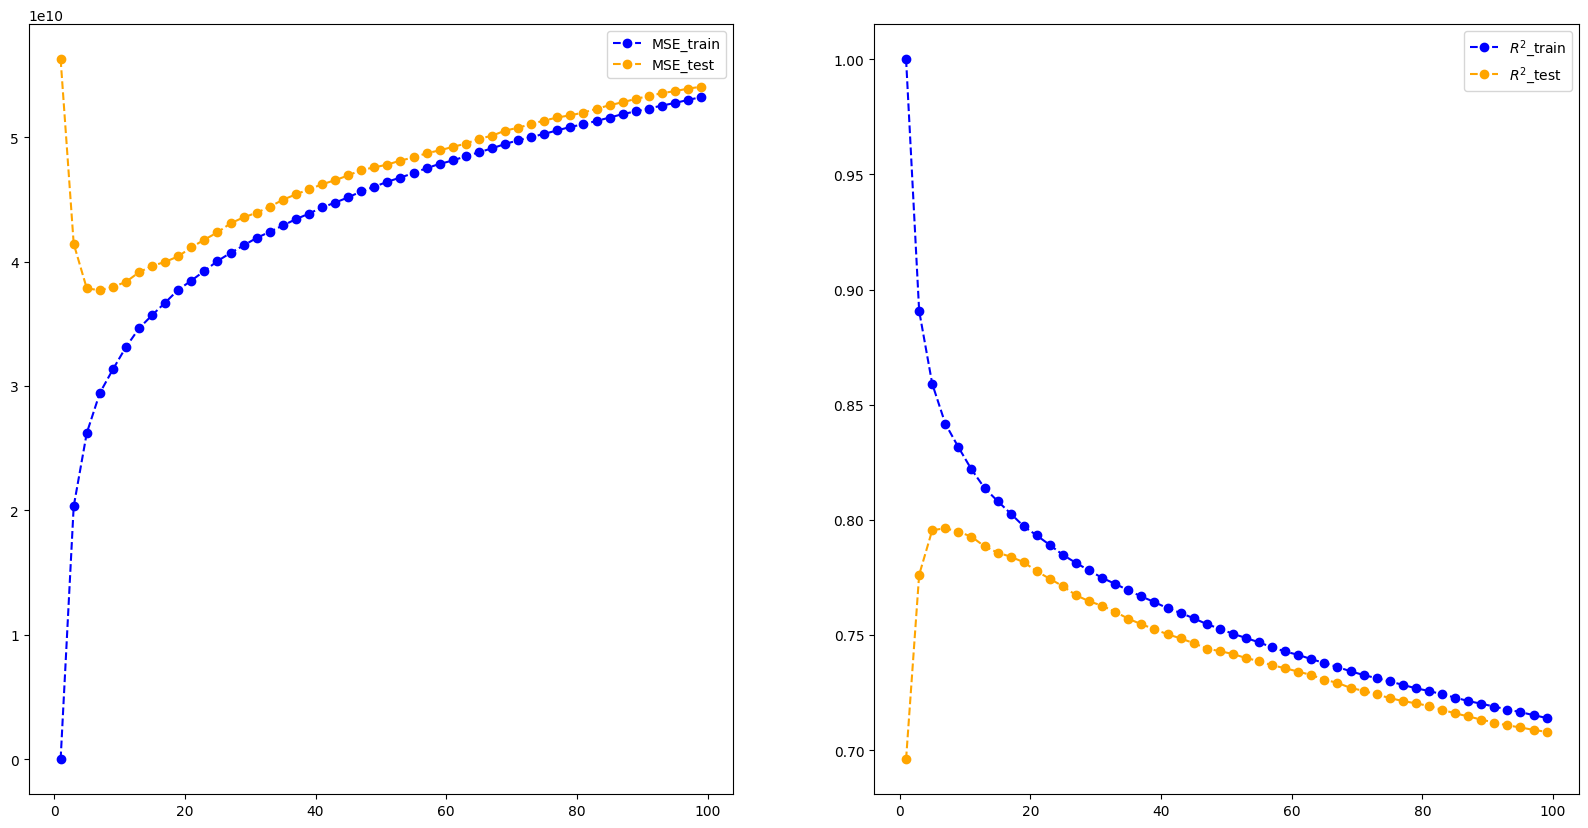

In [ ]:
fig,ax = plt.subplots(1,2,figsize = (20,10))
ax[0].plot(k_arr, [data[k][0] for k in k_arr], 'o--', color = 'blue', label = 'MSE_train')
ax[0].plot(k_arr, [data[k][1] for k in k_arr], 'o--', color = 'orange', label = 'MSE_test')

ax[1].plot(k_arr, [data[k][2] for k in k_arr], 'o--', color = 'blue', label = '$R^2$_train')
ax[1].plot(k_arr, [data[k][3] for k in k_arr], 'o--', color = 'orange', label = '$R^2$_test')

ax[0].legend()
ax[1].legend()


Изучив левый график, можно сделать вывод, что оптимальное число соседей для метода kNN 7-11 рассмотрим этот промежуток подробней.

In [ ]:
from tqdm import tqdm
data = {}
min_k = 2
max_k = 25
#k_arr = [(k-1)*k for k in range(20,32)]
k_arr = range(min_k,max_k,1)
for k in tqdm(k_arr):
    model = KNeighborsRegressor(n_neighbors=k) # по умолчанию n_neighbors=5
    model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    y_test_predict  = model.predict(X_test)
    MSE_train = mean_squared_error(y_train, y_train_predict)
    MSE_test  = mean_squared_error(y_test,  y_test_predict)
    R2_train = r2_score(y_train, y_train_predict)
    R2_test  = r2_score(y_test,  y_test_predict)
    data[k]= (MSE_train,MSE_test,R2_train,R2_test)


100%|██████████| 23/23 [01:20<00:00,  3.48s/it]


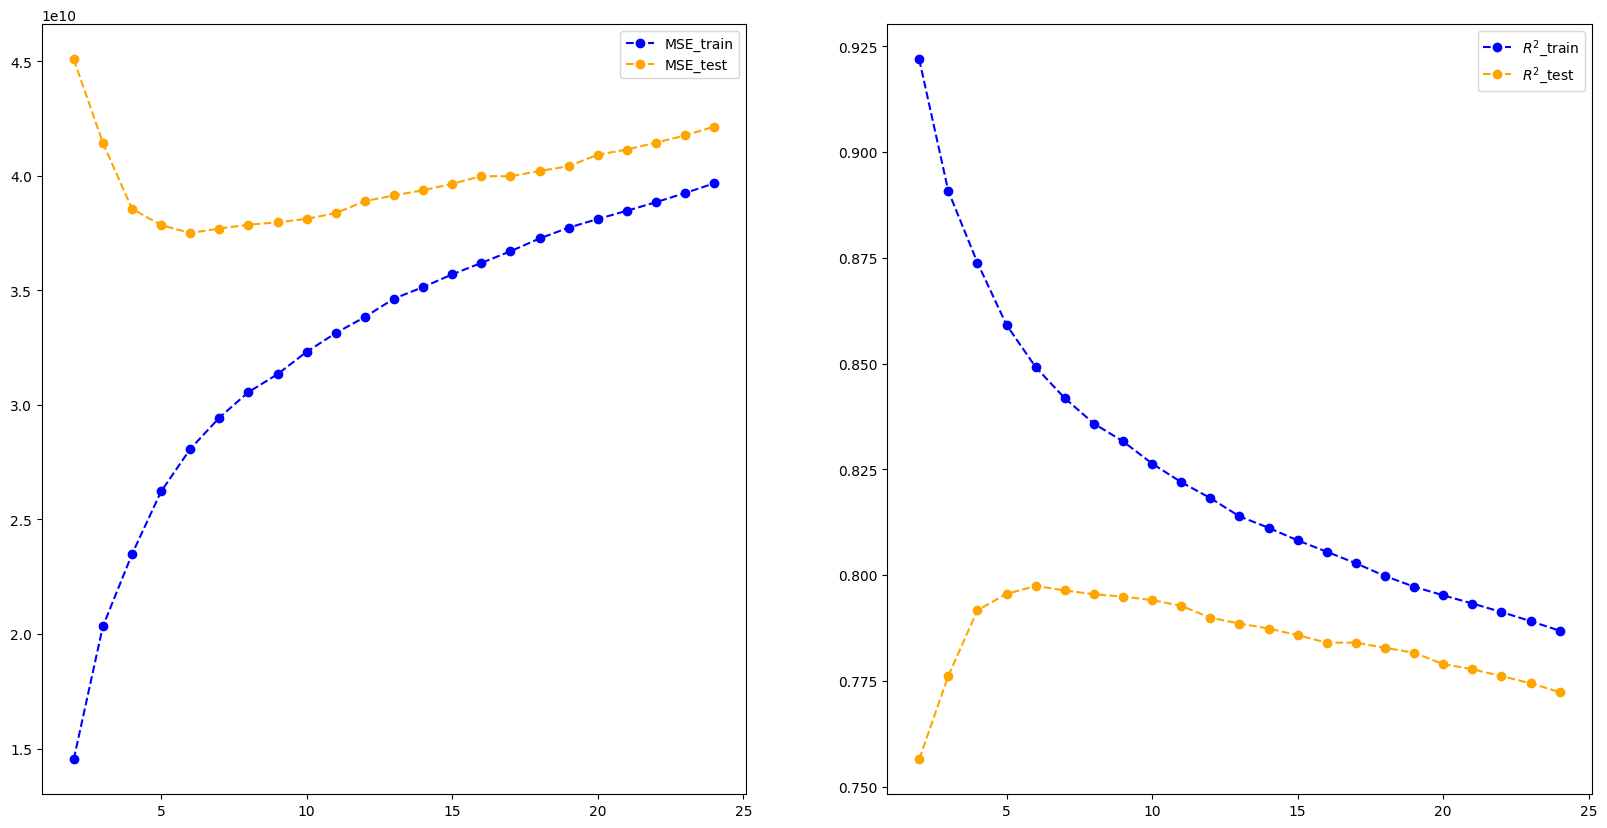

In [ ]:
fig,ax = plt.subplots(1,2,figsize = (20,10))
ax[0].plot(k_arr, [data[k][0] for k in k_arr], 'o--', color = 'blue', label = 'MSE_train')
ax[0].plot(k_arr, [data[k][1] for k in k_arr], 'o--', color = 'orange', label = 'MSE_test')

ax[1].plot(k_arr, [data[k][2] for k in k_arr], 'o--', color = 'blue', label = '$R^2$_train')
ax[1].plot(k_arr, [data[k][3] for k in k_arr], 'o--', color = 'orange', label = '$R^2$_test')

ax[0].legend()
ax[1].legend()


Оптимальное число соседей $k = 8$

In [24]:
model = KNeighborsRegressor(n_neighbors=8) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
print(f'RMSE_train:{np.sqrt(MSE_train)}\n RMSE_test:{np.sqrt(MSE_test)}\n R2_train:{R2_train}\n R2_test:{R2_test}')


RMSE_train:174806.07362758103
 RMSE_test:194593.9759058562
 R2_train:0.835805463982875
 R2_test:0.7954433317495169


 $RMSE\approx2\cdot10^5$ польских злотных

# Выводы
* Имеющиеся данные содержат разнородные признаки, которые были приведены к числовому типу: категориальные были приведены к числовым с помощью oneHotEncoding.
* Данные были разбиты на тестовую и тренировочную выборки
* В результате изучения имеющихся данных было выявлено, что данные имеют процент пропусков, равный 6.54%
    * пропущенные значения тренировочной выборки были заполнены соответствующим медианным значением
* Подозрительные на выбросы данные были удалены (для определения выборос использовались квантили 0.005 и 0.995)  
* подготовленные данные были стандартизированы
* задача регрессии решалась с помощью метода $k$ ближайших соседей
* поиск оптимального гиперпараметра привел к значению $k = 8$
* RMSE на тестовой выборке остается слишком большим, что не позволяет адекватно решать поставленную задачу данным методом

# .для себя


## <font color = 'DodgerBlue'>полносвязная нейросеть</font>

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(40,20,10,5), max_iter = 1, warm_start=True)
import warnings
from sklearn.exceptions import ConvergenceWarning

# Отключаем ConvergenceWarning для более чистого вывода
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
def test_model(X_train,X_test,y_train,y_test,hidden_layer_sizes,max_iter:int,backup_step:int = 10, use_tqdm = True, min_iter = None):
    if min_iter == None:
        min_iter = max_iter//10
    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter = 1, warm_start=True)
    data = []
    x_arr = []
    arr = tqdm(range(max_iter)) if use_tqdm else range(max_iter)
    for i in arr:
        model.fit(X_train, y_train)
        y_train_predict = model.predict(X_train)
        y_test_predict  = model.predict(X_test)
        RMSE_train = (mean_squared_error(y_train, y_train_predict))
        RMSE_test  = (mean_squared_error(y_test,  y_test_predict))
        R2_train = r2_score(y_train, y_train_predict)
        R2_test  = r2_score(y_test,  y_test_predict)
        if (i+1) % backup_step ==0  and (i+1)>min_iter:
            data.append((RMSE_train,RMSE_test,R2_train,R2_test))
            x_arr.append(i+1)
    return x_arr,data

In [ ]:
x,data = test_model(X_train,X_test,y_train,y_test,(40,20,10),1000,25)

100%|██████████| 1000/1000 [02:59<00:00,  5.56it/s]


100%|██████████| 500/500 [04:09<00:00,  2.00it/s]


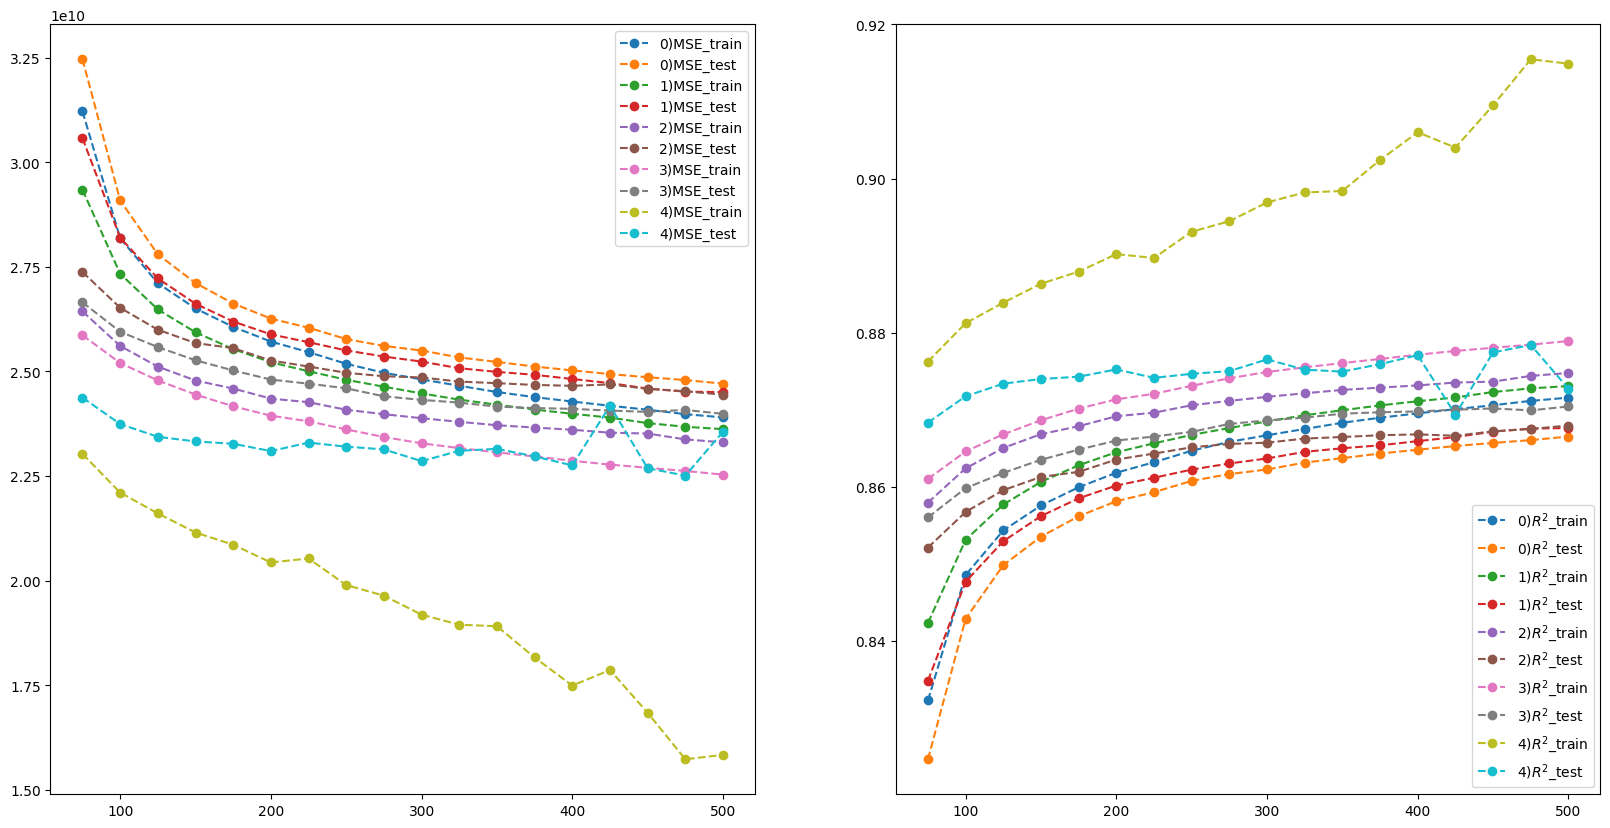

In [ ]:
experiment_params = [(40,20,10),(30,80,10),(20,10,30,10,10),(40,30,20,10),(80,70,60,50,40,30,20,10)]
fig,ax = plt.subplots(1,2,figsize = (20,10))
experiments_data = []
for i,param in enumerate(experiment_params):
    x,data = test_model(X_train,X_test,y_train,y_test,param,500,25)
    experiments_data.append((x,data))
    data_col = lambda i:[line[i] for line in data]
    ax[0].plot(x, data_col(0), 'o--', label = f'{i})MSE_train')
    ax[0].plot(x, data_col(1), 'o--', label = f'{i})MSE_test')

    ax[1].plot(x, data_col(2), 'o--', label = f'{i})$R^2$_train')
    ax[1].plot(x, data_col(3), 'o--', label = f'{i})$R^2$_test')

ax[0].legend()
ax[1].legend()

In [ ]:
experiment_params = [(40,40,40,40,40,40,40,40),(40,20,10,4,10,20,40),(20,30,40,50,60,70,80,90)]
fig,ax = plt.subplots(1,2,figsize = (20,10))
#experiments_data = []
for i,param in enumerate(experiment_params):
    x,data = test_model(X_train,X_test,y_train,y_test,param,500,25)
    experiments_data.append((x,data))
    data_col = lambda i:[line[i] for line in data]


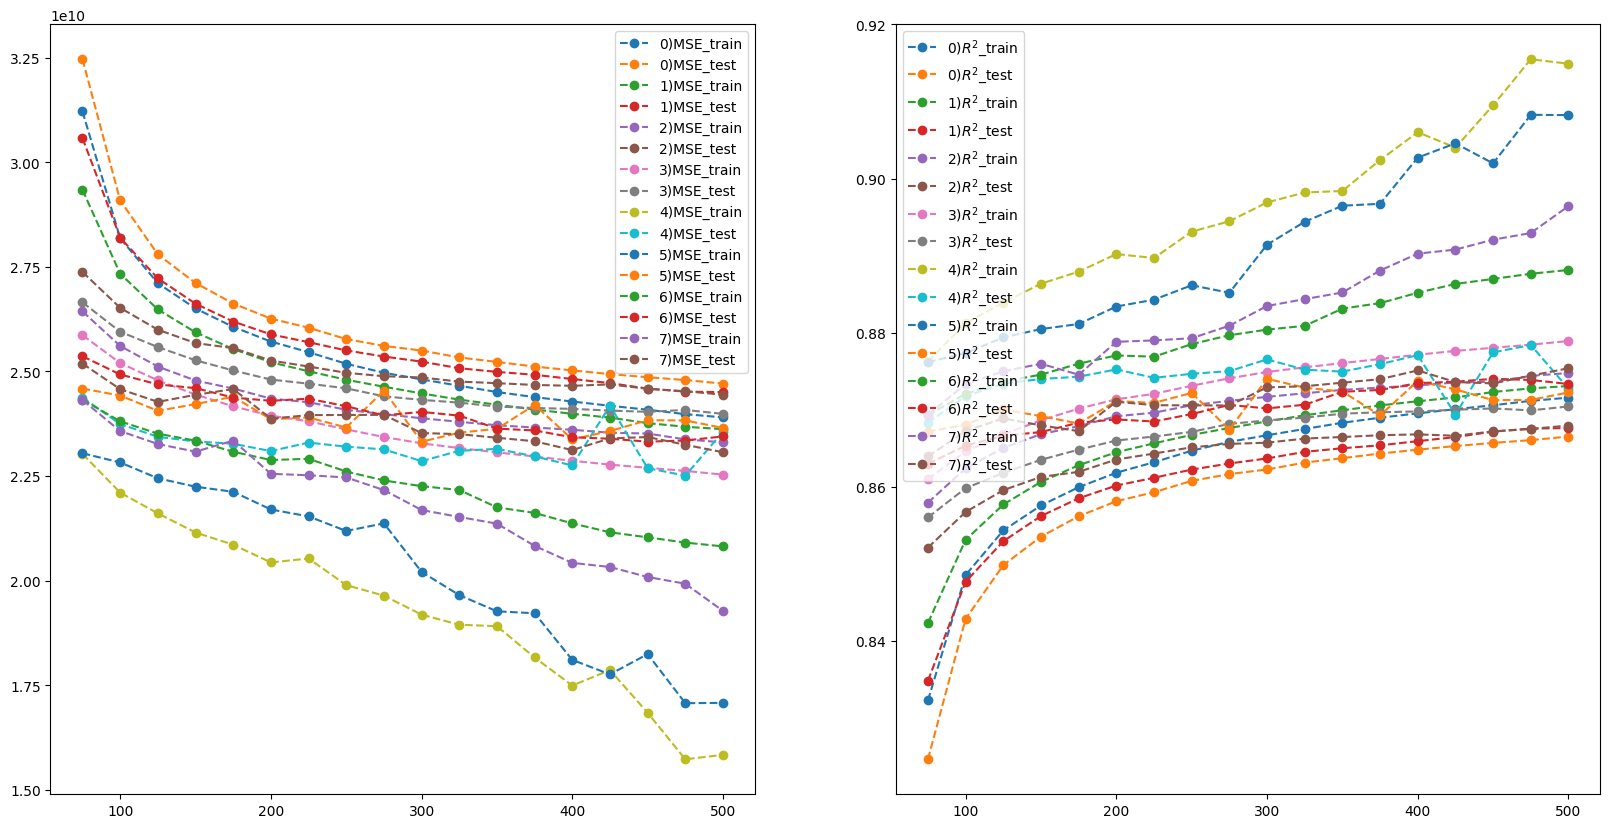

In [ ]:
fig,ax = plt.subplots(1,2,figsize = (20,10))

for i,exp_data in enumerate(experiments_data):
    x,data = exp_data
    data_col = lambda i:[line[i] for line in data]
    ax[0].plot(x, data_col(0), 'o--', label = f'{i})MSE_train')
    ax[0].plot(x, data_col(1), 'o--', label = f'{i})MSE_test')

    ax[1].plot(x, data_col(2), 'o--', label = f'{i})$R^2$_train')
    ax[1].plot(x, data_col(3), 'o--', label = f'{i})$R^2$_test')
ax[0].legend()
ax[1].legend()

Выберем структуры 4,5

In [ ]:
strong_params = [(80,70,60,50,40,30,20,10),(40,40,40,40,40,40,40,40),
                 list((100 -5*i for i in range(100//5-2)))# дополним следующей структурой
                 ]

In [ ]:
for i,param in enumerate(strong_params):
    x,data = test_model(X_train,X_test,y_train,y_test,param,1000,50)
    experiments_data.append((x,data))

100%|██████████| 1000/1000 [42:33<00:00,  2.55s/it]


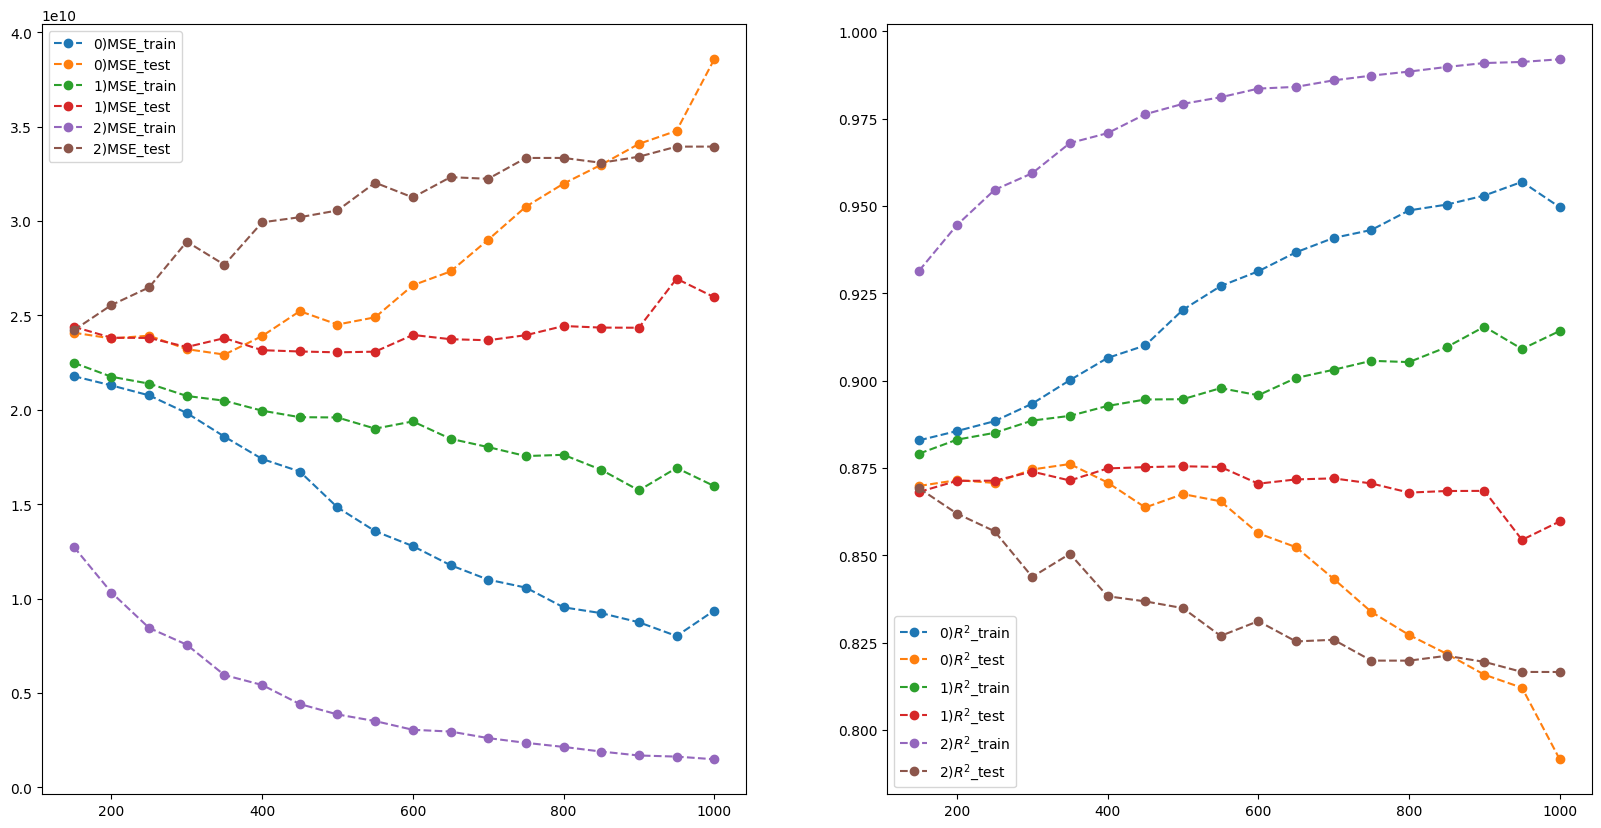

In [ ]:
fig,ax = plt.subplots(1,2,figsize = (20,10))

for i,exp_data in enumerate(experiments_data[len(experiments_data)-3:len(experiments_data)]):
    x,data = exp_data
    data_col = lambda i:[line[i] for line in data]
    ax[0].plot(x, data_col(0), 'o--', label = f'{i})MSE_train')
    ax[0].plot(x, data_col(1), 'o--', label = f'{i})MSE_test')

    ax[1].plot(x, data_col(2), 'o--', label = f'{i})$R^2$_train')
    ax[1].plot(x, data_col(3), 'o--', label = f'{i})$R^2$_test')
ax[0].legend()
ax[1].legend()

при использовании strong_params и при обучении на 1000 итераций наблюдается процесс переобучения, причем последняя модель не может уловить закономерность в данных с самого начала(видно по графику RMSE на тестовой выборке)

##<font color = 'DodgerBlue'>Random Forest</font>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200) # по умолчанию n_estimators=100
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print(f'MSE_train:{MSE_train}\n MSE_test:{MSE_test}\n R2_train:{R2_train}\n R2_test:{R2_test}')

MSE_train:2631562366.370846
 MSE_test:524582418695.7015
 R2_train:0.9858596769466395
 R2_test:-1.8337960425477648


In [ ]:
y_train.describe()

count    1.612500e+04
mean     8.225889e+05
std      4.314104e+05
min      1.910000e+05
25%      5.490000e+05
50%      7.200000e+05
75%      9.600000e+05
max      3.000000e+06
Name: price, dtype: float64